<a href="https://colab.research.google.com/github/sreejagundu/Handwritten_Digit_Recognition/blob/main/Handwritten_Digit_Recognition_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow import keras
from keras import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

In [3]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
len(np.unique(y_train))

10

In [5]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = (28,28)))
model.add(keras.layers.Dense(300,activation ='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))

In [6]:
model.compile(loss="sparse_categorical_crossentropy",optimizer='Adam',metrics=['accuracy'])

In [7]:
history = model.fit(x_train,y_train,epochs = 5,validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 11s 7ms/step - loss: 3.2187 - accuracy: 0.8916 - val_loss: 0.5102 - val_accuracy: 0.9202
Epoch 2/5
1500/1500 [==============================] - 11s 7ms/step - loss: 0.3898 - accuracy: 0.9280 - val_loss: 0.3409 - val_accuracy: 0.9320
Epoch 3/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2784 - accuracy: 0.9373 - val_loss: 0.3320 - val_accuracy: 0.9373
Epoch 4/5
1500/1500 [==============================] - 5s 4ms/step - loss: 0.2642 - accuracy: 0.9428 - val_loss: 0.3535 - val_accuracy: 0.9423
Epoch 5/5
1500/1500 [==============================] - 5s 4ms/step - loss: 0.2556 - accuracy: 0.9451 - val_loss: 0.3900 - val_accuracy: 0.9360


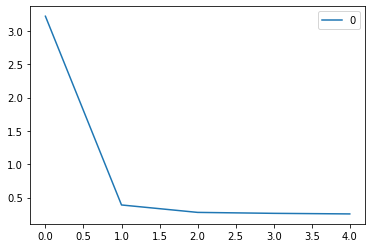

In [8]:
pd.DataFrame(history.history['loss']).plot()

In [9]:
y_pred = (model.predict(x_test) > 0.5).astype("int32")
y_pred

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [10]:
y_test.astype("int32")

array([7, 2, 1, ..., 4, 5, 6], dtype=int32)

In [11]:
from sklearn.metrics import accuracy_score,confusion_matrix
confusion_matrix(np.argmax(y_pred,axis=1),y_test)

array([[ 971,    9,   25,   24,    3,   26,   25,   12,   64,   16],
       [   0, 1066,    3,    0,    0,    0,    5,    4,    3,    6],
       [   1,   27,  972,    8,    4,    2,    8,   24,   14,    1],
       [   0,    1,   11,  922,    0,    6,    0,    6,    8,    3],
       [   0,    0,    3,    0,  952,    4,   11,    4,   16,   33],
       [   0,    2,    2,   41,    3,  827,   13,    1,   22,   25],
       [   3,    1,    1,    0,    4,    4,  891,    0,    1,    0],
       [   1,    3,    4,    4,    1,    1,    0,  960,    1,    7],
       [   4,   26,    8,    8,    4,   16,    5,    2,  834,    1],
       [   0,    0,    3,    3,   11,    6,    0,   15,   11,  917]])

In [12]:
accuracy_score(np.argmax(y_pred,axis=1),y_test)


0.9312

In [13]:
model.save("mnist.hdf5")

In [14]:
model_new = keras.models.load_model('mnist.hdf5')

In [15]:
import cv2

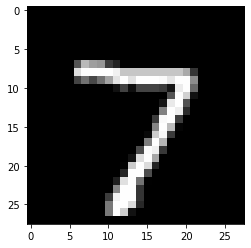

In [16]:
image_test = x_test[0]
plt.imshow(image_test,cmap='gray')

In [17]:
image_test = np.expand_dims(image_test,axis=0)
image_test.shape

(1, 28, 28)

In [18]:
op = cv2.resize(image_test,(28,28))

In [19]:
model_new_pred=model_new.predict(op)
np.argmax(model_new_pred,axis=1)[0]

7

In [20]:
!pip install streamlit
!pip install streamlit-drawable-canvas
!pip install pyngrok==4.1.1
from pyngrok import ngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
import cv2
from PIL import Image
import streamlit as st
from tensorflow import keras
from streamlit_drawable_canvas import st_canvas

# Specify canvas parameters in application
stroke_color = "#ffffff"
bg_color =  "#000000"


model_new = keras.models.load_model('mnist.hdf5')


# Create a canvas component
canvas_result = st_canvas(
    fill_color="#000000",  # Fixed fill color with some opacity
    stroke_width=20,
    stroke_color=stroke_color,
    background_color= bg_color,
    height = 256,width=256,
    key="canvas",
)


if canvas_result.image_data is not None:
    img = cv2.resize(canvas_result.image_data.astype('uint8'), (28, 28))
    rescaled = cv2.resize(img, (256,256), interpolation=cv2.INTER_NEAREST)
    st.write('Model Input')
    st.image(rescaled)

if st.button('Predict'):
    test_x = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    val = model_new.predict(test_x.reshape(1, 28, 28))
    st.write(f'result: {np.argmax(val[0])}')
    st.bar_chart(val[0])




Overwriting app.py


In [22]:
!nohup streamlit run app.py &

public_url = ngrok.connect(port='8501')
print(public_url)

nohup: appending output to 'nohup.out'
http://1edc-35-197-0-172.ngrok.io
